In [1]:
!pip install wget
!pip install scikit-learn==1.5

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ce4b366ad9f70753c019f71fd0b87f1921ae46b96a134edc59a589997bfb388e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wget
import time as time
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import root_mean_squared_error

# your import here

## Import Dataset

In [3]:
wget.download('https://github.com/MIE451-2024/course-datasets/raw/refs/heads/main/sale_data.zip', 'sale_data.zip')

'sale_data.zip'

In [4]:
!unzip sale_data.zip
DATA_DIR = 'sale_data'

Archive:  sale_data.zip
   creating: sale_data/
  inflating: __MACOSX/._sale_data    
  inflating: sale_data/.DS_Store     
  inflating: __MACOSX/sale_data/._.DS_Store  
  inflating: sale_data/weather_data.csv  
  inflating: __MACOSX/sale_data/._weather_data.csv  
  inflating: sale_data/train_data_assignment.csv  
  inflating: sale_data/cleaned_test_data.csv  
  inflating: __MACOSX/sale_data/._cleaned_test_data.csv  
  inflating: sale_data/test_data_assignment.csv  
  inflating: __MACOSX/sale_data/._test_data_assignment.csv  
  inflating: sale_data/cleaned_train_data.csv  
  inflating: __MACOSX/sale_data/._cleaned_train_data.csv  


In [5]:
# get the train data
train_data = pd.read_csv(DATA_DIR+"/train_data_assignment.csv")
# get the test data
test_data = pd.read_csv(DATA_DIR+"/test_data_assignment.csv")

## Q1

### Q1 (a)

In [63]:
def basic_stats(data: pd.DataFrame) -> tuple:

    # Codes for Q1a

    num_of_total_records = len(data) # (int) Number of total records in the 'data'

    num_of_features = data.shape[1] # (int) The number of features in the 'data' including the target feature 'Sales'

    num_of_total_unique_date = len(data['Date'].unique()) # (int) Number of unique dates available in the 'data'

    num_unique_assortment = len(data['Assortment'].unique())

    num_of_unique_store = len(data['Store'].unique()) # (int) Number of stores available in the 'data'

    mean_sales = data['Sales'].mean() # (float) Mean of the target feature 'Sales'

    return num_of_total_records, num_of_features, num_of_total_unique_date, num_of_unique_store, mean_sales

In [64]:
results = basic_stats(train_data)

# report results
print("Number of total records: ", results[0])
print("Number of features: ", results[1])
print("Number of total unique date: ", results[2])
print("Number of unique store: ", results[3])
print("Mean of the target feature 'Sales': ", results[4])

Number of total records:  539011
Number of features:  14
Number of total unique date:  942
Number of unique store:  1112
Mean of the target feature 'Sales':  6960.811078067052




*   **Number of unique store types**: The total number of unique stores available in data
*   **Number of unique promotion intervals**: The total number of unique intervals in which the consecutive promotion (Promo2) was started, as described by PromoInterval in data
*   **Number of unique holidays**: The total number of unique state holidays in data





In [65]:
# validation code
assert (isinstance(results[0], int)), "Return type of the value should be int"
assert (isinstance(results[1], int)), "Return type of the value should be int"
assert (isinstance(results[2], int)), "Return type of the value should be int"
assert (isinstance(results[3], int)), "Return type of the value should be int"
assert (isinstance(results[4], float)), "Return type of the value should be float"

### Q1 (b)

In [66]:
def schoolholiday_count(data: pd.DataFrame) -> plt.Axes:
    fig = plt.subplots(figsize=(10, 6))

    # Codes for Q1b, you should store the axes of your counter plot in the variable 'counter_plot',
    # please refer to CounterPlot() in the lab notebook for an example
    counter_plot = sns.countplot(x='SchoolHoliday', data=data)

    counter_plot.set_title('Count of Records Affected by School Holidays')
    counter_plot.set_xlabel('School Holiday (0 = No, 1 = Yes)')
    counter_plot.set_ylabel('Count')

    return counter_plot

In [67]:
def sales_vs_promo2_bar(data: pd.DataFrame) -> plt.Axes:
    fig = plt.subplots(figsize=(10, 6))

    bar_plot = sns.barplot(x='Promo2', y='Sales', data=data, errorbar=None)
    bar_plot.set_title('Average Sales with and without Promo2')
    bar_plot.set_xlabel('Promo2 (0 = No, 1 = Yes)')
    bar_plot.set_ylabel('Average Sales')

    return bar_plot

In [68]:
def sales_vs_competition_scatter(data: pd.DataFrame) -> plt.Axes:
    fig = plt.figure(figsize=(10, 6))

    # Codes for Q1b
    scatter_plot = sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
    scatter_plot.set_title('Sales vs. Competition Distance')
    scatter_plot.set_xlabel('Competition Distance (meters)')
    scatter_plot.set_ylabel('Sales')

    return scatter_plot


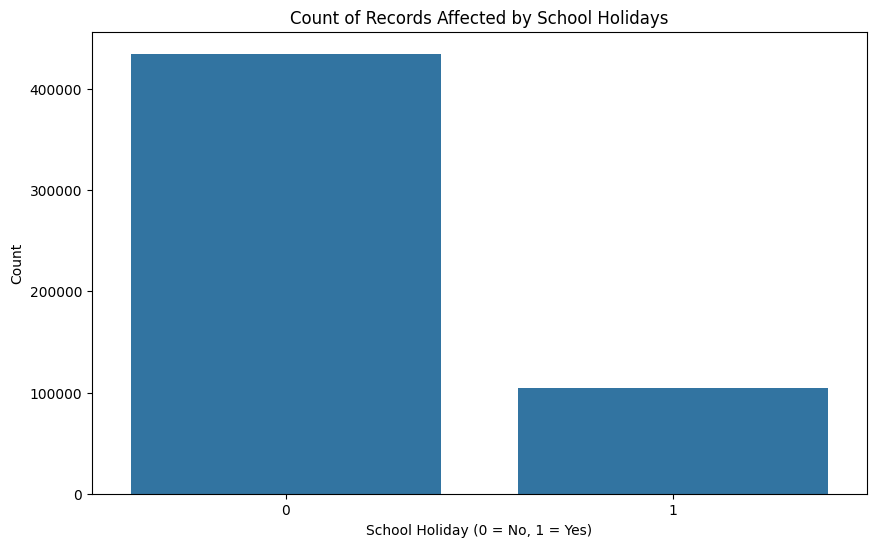

In [69]:
# plot the counter plot
ax1 = schoolholiday_count(train_data)
plt.show()

*   SchoolHoliday Count Plot:
  * The majority of the records are not affected by school holidays (SchoolHoliday = 0), as evident by the large difference between the two bars, which may suggest that school holidays may have a limited effect on overall sales. However, it is still not small enough to deem it as insignificant. Further analysis is needed to confirm the impact.

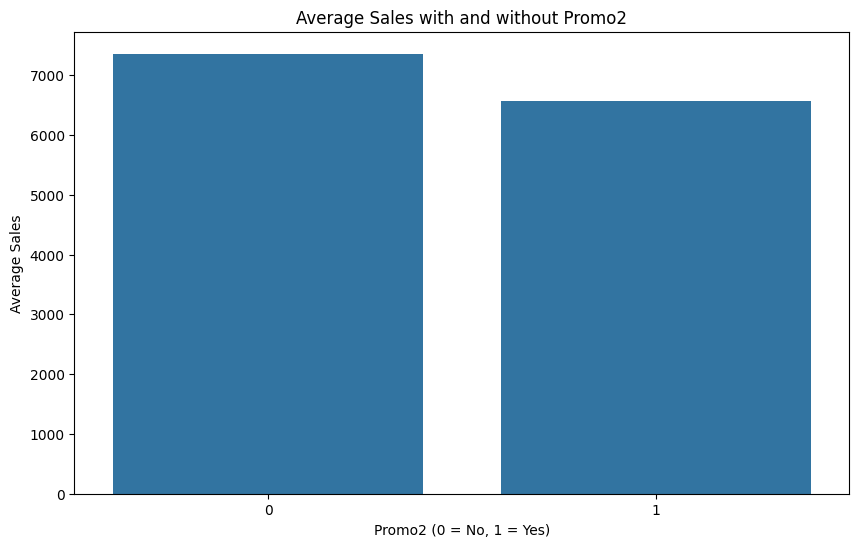

In [70]:
# plot the bar plot
ax2 = sales_vs_promo2_bar(train_data)
plt.show()

*   Sales vs Promo2 Bar Plot:
  * Interestingly, stores without consecutive promotions (Promo2 = 0) have slightly higher average sales compared to stores with consecutive promotions (Promo2 = 1). This counterintuitive result might suggest that the effectiveness of Promo2 is not straightforward and could be influenced by other factors.

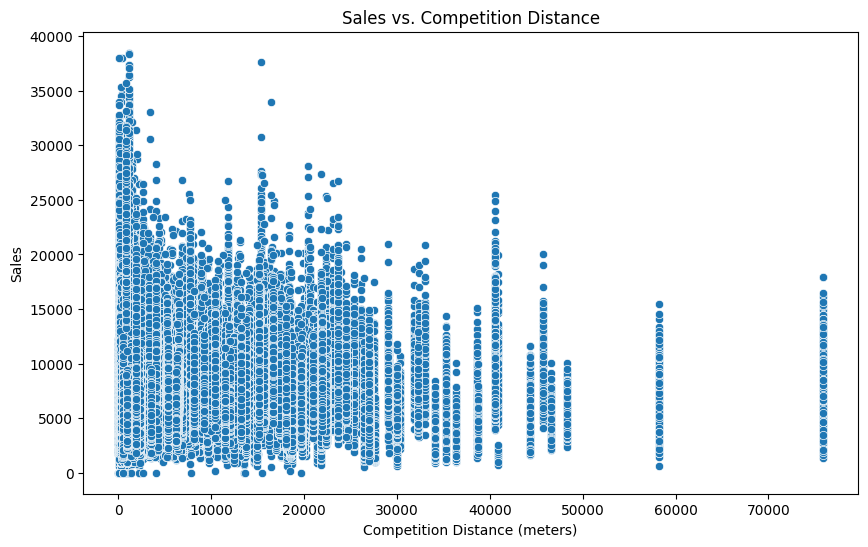

In [14]:
# plot the scatter plot
ax3 = sales_vs_competition_scatter(train_data)
plt.show()



*   Sales vs Competition Distance Scatter Plot:
  * There appears to be a general trend where sales tend to be higher when the competition distance is smaller. However, the scatter is quite dense, indicating that while competition distance may play a role, it is not the only factor influencing sales.



In [15]:
assert (isinstance(ax1, plt.Axes)), "Return type of the value should be matplotlib.axes._subplots.Axes"
assert (isinstance(ax2, plt.Axes)), "Return type of the value should be matplotlib.axes._subplots.Axes"
assert (isinstance(ax3, plt.Axes)), "Return type of the value should be matplotlib.axes._subplots.Axes"

### Q1 (c)

In [18]:
def missing_data(data: pd.DataFrame) -> dict:
    # Codes for
    missing_count = data.isnull().sum().to_dict()

    return missing_count

In [19]:
# report the missing data
missing_data(train_data)

{'Store': 0,
 'Date': 0,
 'DayOfWeek': 0,
 'Customers': 0,
 'StateHoliday': 0,
 'SchoolHoliday': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 0,
 'Promo': 0,
 'Promo2': 0,
 'PromoInterval': 0,
 'State': 0,
 'Sales': 0}

After analyzing the dataset, we found no missing values across any of the features. This indicates that the dataset is complete and doesn't require any imputation or handling of missing data. This simplifies the data preprocessing steps, as we can move forward without worrying about filling or removing any incomplete records.

In [21]:
assert (isinstance(missing_data(train_data), dict)), "Return type of the value should be dict"

## Q2

### Q2 (a)

Modify the partial code below

In [32]:
def clean_data(data: pd.DataFrame) -> pd.DataFrame:

    '''
    Please Complete Following Task in this function:

    1. Convert 'Date' column to three column with name 'Year', 'Month', and 'Day'
       For example, 2015-07-31 should be converted to 2015, 7, 31
    '''
    clean_data = data.copy()

    # codes for task1
    clean_data['Date'] = pd.to_datetime(clean_data['Date'], format='%Y-%m-%d')
    clean_data['Year'] = clean_data['Date'].dt.year
    clean_data['Month'] = clean_data['Date'].dt.month
    clean_data['Day'] = clean_data['Date'].dt.day

    '''
    2. Create 3 indicator variables for 'Assortment' column with name 'Assortment_a', 'Assortment_b', and 'Assortment_c'
            For example, if 'Assortment' is 'a', then 'Assortment_a' should be 1 and all other indicator variables should be 0

    '''
    # codes for task2
    clean_data['Assortment_a'] = (clean_data['Assortment'] == 'a').astype(int)
    clean_data['Assortment_b'] = (clean_data['Assortment'] == 'b').astype(int)
    clean_data['Assortment_c'] = (clean_data['Assortment'] == 'c').astype(int)

    '''
    3. Drop 'Date' and 'Assortment' columns
    '''
    # codes for task3
    clean_data = clean_data.drop(columns=['Date', 'Assortment'])

    return clean_data

In [36]:
# report the cleaned data
cleaned_data = clean_data(train_data)
cleaned_data.columns

Index(['Store', 'DayOfWeek', 'Customers', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'CompetitionDistance', 'Promo', 'Promo2', 'PromoInterval',
       'State', 'Sales', 'Year', 'Month', 'Day', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [37]:
assert (isinstance(cleaned_data, pd.DataFrame)), "Return type of the value should be pd.DataFrame"

### Q2 (b)

In [38]:
# DO NOT MODIFY THIS CELL
# This will be the provided cleaned data for the rest of the assignment
cleaned_train_data = pd.read_csv(DATA_DIR+"/cleaned_train_data.csv")
cleaned_train_data.columns

Index(['Store', 'Year', 'Customers', 'SchoolHoliday', 'CompetitionDistance',
       'Promo', 'Promo2', 'PromoInterval', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Month',
       'DayOfMonth', 'Sales'],
      dtype='object')

In [39]:
def calculate_mi(data: pd.DataFrame) -> pd.Series:
    # Codes for Q2b
    mi = data.apply(lambda x: mutual_info_score(x, data['Sales']), axis=0)
    mi = mi.sort_values(ascending=False)

    return mi

In [40]:
cleaned_train_data = pd.read_csv(DATA_DIR+"/cleaned_train_data.csv")
# report the mutual information
mi = calculate_mi(cleaned_train_data)
mi

,0
Sales,9.282939
Customers,3.243215
Store,3.160365
CompetitionDistance,2.479647
DayOfMonth,0.459876
Month,0.198364
Promo,0.116766
Year,0.042779
Saturday,0.042146
Promo2,0.030368


In [41]:
assert (isinstance(mi, pd.Series)), "Return type of the value should be pd.Series"

### Q2 (c)



*   Mutual information (MI) gives the dependency between the features and the target variable (Sales). It helps us understand how much information each feature contributes to predicting Sales.
* In machine learning, MI can guide feature selection by identifying which features are most informative, allowing us to focus on those that provide the highest predictive value and potentially improve model accuracy.

*   Feature with the highest MI (excluding Sales itself): **Customers** (MI: 3.243215)
  * This indicates that the number of customers has the strongest relationship with Sales.
* Feature with the lowest MI: **StateHoliday_c**, (MI: 0.000446)
  * This indicates that StateHoliday_c provides almost no additional information for predicting Sales.

* One potential problem with calculating MI on categorical features:
  * MI may overestimate the importance of features with many unique categories (high cardinality), especially if the target variable is continuous. This can lead to misleading results, where categorical features with many unique values appear more informative than they truly are.

* Yes, the results make sense. For example, Customers having the highest MI score is expected because the more customers typically result in higher sales.
* The low MI score for features like StateHoliday_c or StateHoliday_b is also reasonable, as specific holidays may not strongly influence overall sales compared to other features like promotions or store type.




### Q2 (d)

In [50]:
def new_features(data: pd.DataFrame) -> pd.DataFrame:
    new_data = data.copy()
    # uncomment following code if you want to use the 'Date' column
    # new_data['Date'] = new_data['Year'].astype(str) + '-' + new_data['Month'].astype(str) + '-' + new_data['DayOfMonth'].astype(str)
    # new_data['Date'] = pd.to_datetime(new_data['Date'])

    # Codes for Q2d:
    #### IMPORTANT_NOTE : ######
    # Please ensure that this function you implement runs without any errors.
    # If the function fails to run, you will receive no marks for all the remaining questions (they rely on this function).
    # If you’re uncertain about the solution, you can keep the given code, which will return the input dataframe without any changes.
    # In this case, you will receive zero marks for this question, but not effect the subsequent questions.

    #DO NOT FORGET TO DROP 'Date' COLUMN AFTER YOU USE IT
    # new_data.drop(['Date'], axis=1, inplace=True)

    new_data['Promo2Duration'] = new_data.groupby('Store')['Promo2'].cumsum()

    new_data['PromoFrequency'] = new_data.groupby('Store')['Promo'].transform('sum')

    new_data['MonthPromoInteraction'] = new_data['Month'] * new_data['Promo']

    return new_data

In [51]:
# generated new features and calculate the mutual information
cleaned_train_data = pd.read_csv(DATA_DIR+"/cleaned_train_data.csv")
data_with_new_features = new_features(cleaned_train_data)
mi = calculate_mi(data_with_new_features)
mi

,0
Sales,9.282939
Customers,3.243215
Store,3.160365
CompetitionDistance,2.479647
Promo2Duration,1.504636
PromoFrequency,0.765716
DayOfMonth,0.459876
MonthPromoInteraction,0.286617
Month,0.198364
Promo,0.116766


- All three features ranked higher up in the list with scores 1.504646, 0.765716, 0.286617 where Promo2Duration, PromoFrequency has fairly high MI scores and MonthPromoInteraction's score wasn't highly significant.
- Promo2Duration ranked the highest among the new features with an MI score of 1.504646. This feature likely performed well because longer-running promotions (Promo2) have a more sustained effect on customer behavior, potentially leading to higher sales. Stores with ongoing promotions tend to attract more attention over time, which increases their sales.


In [ ]:
assert (isinstance(data_with_new_features, pd.DataFrame)), "Return type of the value should be pd.DataFrame"

## Q3

### Q3 (a)

In [52]:
cleaned_train_data = pd.read_csv(DATA_DIR+"/cleaned_train_data.csv")
X = cleaned_train_data.drop('Sales', axis=1)
y = cleaned_train_data['Sales']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_valid.shape)

(431208, 38) (107803, 38)


In [60]:
def Q3a(X: pd.DataFrame, y: pd.Series, alpha: float) -> linear_model.LinearRegression|linear_model.Lasso|linear_model.Ridge:
    # Codes for Q3a
    model = linear_model.Ridge(alpha = alpha)
    model.fit(X, y)
    return model

In [61]:
# train the model
Q3a_model = Q3a(X_train, y_train, 1.0)
if Q3a_model is not None:
    # report the coefficients
    print(pd.DataFrame(Q3a_model.coef_, index=X.columns, columns=['Coefficient']))

                     Coefficient
Store                  -0.101796
Year                  156.796586
Customers               7.298386
SchoolHoliday         182.509637
CompetitionDistance     0.024255
Promo                1293.237250
Promo2                 17.047856
PromoInterval          68.191426
Assortment_a         1241.844409
Assortment_b        -2797.138450
Assortment_c         1555.294035
StateHoliday_0       -607.223947
StateHoliday_a       -429.933526
StateHoliday_b       -615.217710
StateHoliday_c       1652.375183
StoreType_a           570.371309
StoreType_b         -2687.873921
StoreType_c           428.438172
StoreType_d          1689.064440
February              -35.970324
March                  20.464397
April                  -8.615675
May                    17.927718
June                   46.122475
July                  -78.001677
August               -280.489575
September            -281.031905
October              -314.289945
November               -9.498806
December  

The coefficients represent the strength and direction of the relationship between each feature and the target variable (Sales).
- Positive coefficient means as the feature value increases, the target variable (sales) tends to increase, while a negative coefficient suggests the opposite.



In [71]:
assert (isinstance(Q3a_model, linear_model.LinearRegression) or isinstance(Q3a_model, linear_model.Lasso) or isinstance(Q3a_model, linear_model.Ridge)), "Return type of the value should be LinearRegression, Lasso or Ridge"

### Q3 (b)

In [154]:
def Q3b(X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame, y_val: pd.Series) -> dict:
    hyper_params = [1, 3, 5.5, 7.5, 10] # list of possible value of tuning alpha(5 different values)
    # hyper_params = np.arange(5.45, 5.55, 0.001)
    results = {} # dictionary to store the results

    for hyper_param in hyper_params:
        # model with value hyper_param in the tuning hyperparameter using Q3a
        model = Q3a(X_train, y_train, hyper_param)
        # prediction of the model using X_val
        y_pred = model.predict(X_val)
        # root mean squared error of the model with y_val and y_pred
        rmse = root_mean_squared_error(y_val, y_pred)
        # key: hyper_param, value: mean_rmse
        results[hyper_param] = rmse

    # plot the results
    fig, axis = plt.subplots(1,1,figsize=(6,6))
    sns.lineplot(x=list(results.keys()), y=list(results.values()), ax=axis)

    axis.set_xlabel('Alpha')
    axis.set_ylabel('RMSE')
    axis.set_title('RMSE of Ridge Regression with Different Alpha')

    return results

,Hyperparamter,Mean RMSE
2,5.5,1259.385163
3,7.5,1259.385479
1,3.0,1259.385749
4,10.0,1259.386579
0,1.0,1259.387288


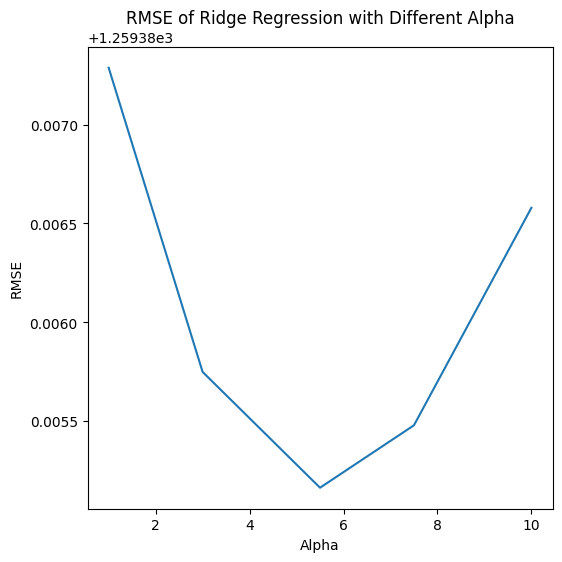

In [155]:
results = Q3b(X_train, y_train, X_valid, y_valid)
pd.DataFrame(results.items(), columns=['Hyperparamter', 'Mean RMSE']).sort_values(by='Mean RMSE')

alpha = 5.5 gave the lowest RMSE of 1259.385163

In [156]:
assert (isinstance(results , dict)), "Return type of the value should be dict"

### Q3 (c)

In [176]:
def Q3c(X: pd.DataFrame, y: pd.Series) -> linear_model.Ridge:
    # Codes for Q3c
    features = ['Promo2Duration', 'PromoFrequency', 'MonthPromoInteraction',
            'Customers', 'CompetitionDistance', 'Promo', 'Assortment_a',
            'Assortment_b', 'Assortment_c', 'StoreType_a', 'StoreType_b',
            'StoreType_c', 'StoreType_d', 'SchoolHoliday', 'StateHoliday_0',
            'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c']
    X = X[features]

    model = linear_model.Ridge(alpha = 5.5)
    rmse = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    mean_rmse = np.mean(np.sqrt(-rmse))

    return model, mean_rmse

In [177]:

cleaned_train_data = pd.read_csv(DATA_DIR+"/cleaned_train_data.csv")
# generate new features
data_with_new_features = new_features(cleaned_train_data)
# obtain observed features and target feature
X = data_with_new_features.drop('Sales', axis=1)
y = data_with_new_features['Sales']
# train the model
Q3c_model, mean_rmse = Q3c(X, y)
mean_rmse

36.32992346307945

Yes they improved significantly (1259 -> 36.33)

In [ ]:
assert (isinstance(Q3c_model, linear_model.Ridge)), "Return type of the value should be Ridge"
assert (isinstance(mean_rmse, float)), "Return type of the value should be float"

### Q3 (d)

In [171]:
def Q3d(X: pd.DataFrame, y: pd.Series) -> plt.Axes:
   # Codes for Q3d

   top_features = ['Customers', 'Store', 'CompetitionDistance', 'DayOfMonth', 'Month',
                    'Promo', 'Year', 'Saturday', 'Promo2', 'PromoInterval', 'Assortment_a',
                    'Assortment_c', 'December', 'StoreType_a', 'StoreType_d', 'StoreType_b',
                    'Friday', 'SchoolHoliday', 'Thursday', 'Wednesday'] # top 20 features with the highest mutual information excluding the target feature 'Sales'
   K = range(1, 21)
   rmse = pd.DataFrame()
   for k in K:
      # select the top k features
      features = top_features[:k]
      # train the Ridge model with the selected features (you can choose you own alpha)
      model = linear_model.Ridge(alpha = 5.5)
      # calculate the RMSE using 3-fold cross validation
      cv_result = cross_val_score(model, X[features], y, cv=3, scoring='neg_root_mean_squared_error')
      # store the RMSE as a pandas DataFrame
      test_rmse = -cv_result
      current_rmse = pd.DataFrame({'test': test_rmse})
      current_rmse['k'] = k
      # append the current_rmse to the rmse DataFrame
      rmse = pd.concat([rmse, current_rmse], ignore_index=True)

   # plot the line plot using seaborn lineplot of K and RMSE with 95% confidence interval
   plt.figure(figsize=(10, 6))
   line_plot = sns.lineplot(x='k', y='test', data=rmse, errorbar='ci', label='Validation')

   plt.title(f'RMSE by Top K Features based on Mutual Information')
   plt.xlabel('Top K Features in Model')
   plt.ylabel('RMSE')

   return line_plot

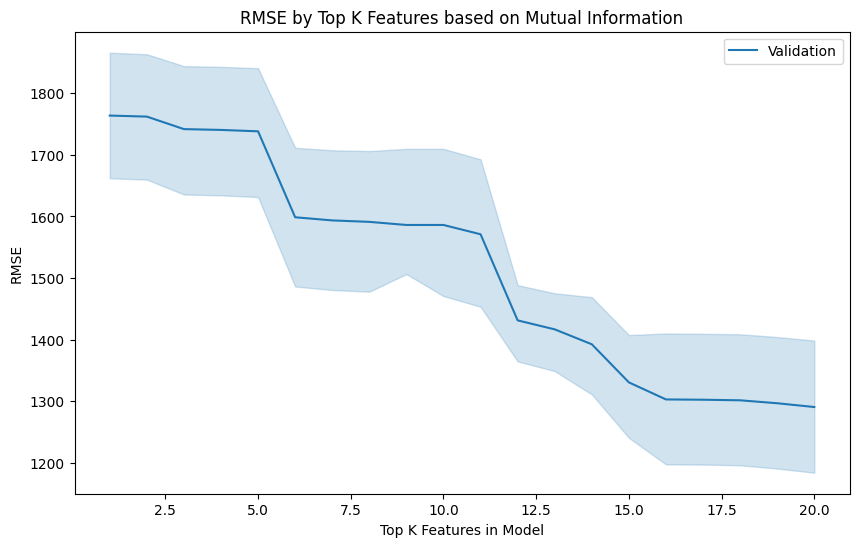

In [172]:
cleaned_train_data = pd.read_csv(DATA_DIR+"/cleaned_train_data.csv")
X = cleaned_train_data.drop('Sales', axis=1)
y = cleaned_train_data['Sales']

line_plot = Q3d(X, y)
plt.show()

It hasn't really improved, especially from 3(c). This is probably because of the features created in 2d had a relatively high MI, which allows the model to focus on the most relevant features and avoids overfitting to less important ones.

In [175]:
assert (isinstance(line_plot, plt.Axes)), "Return type of the value should be matplotlib.axes._subplots.Axes"

### Q3(e)

In [178]:
def Q3e(train_data: pd.DataFrame, test_data: pd.DataFrame) -> float:
    X_train = train_data.drop('Sales', axis=1)
    y_train = train_data['Sales']

    X_test = test_data.drop('Sales', axis=1)
    y_test = test_data['Sales']

    # (optional) Codes for Q3e (if you want select a subset of features)
    features = ['Promo2Duration', 'PromoFrequency', 'MonthPromoInteraction',
        'Customers', 'CompetitionDistance', 'Promo', 'Assortment_a',
        'Assortment_b', 'Assortment_c', 'StoreType_a', 'StoreType_b',
        'StoreType_c', 'StoreType_d', 'SchoolHoliday', 'StateHoliday_0',
        'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'] # MODIFY THIS LINE TO CHANGE THE FEATURES (default is all features)

    # ensure the columns are in the same order
    X_test = X_test[features]
    X_train = X_train[features]

    # Codes for Q3e

    # 1. Train your best model on the train_data (X_train, y_train)
    # 2. Predict on the test_data (X_test)
    # 3. Calculate the RMSE for the test_data prediction based on the ground truth (y_test)

    model = linear_model.Ridge(alpha = 5.5)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)

    #return the rmse
    return rmse

In [179]:
cleaned_train_data = pd.read_csv(DATA_DIR+"/cleaned_train_data.csv")
cleaned_train_data = new_features(cleaned_train_data)
cleaned_test_data = pd.read_csv(DATA_DIR+"/cleaned_test_data.csv")
cleaned_test_data = new_features(cleaned_test_data)

rmse = Q3e(cleaned_train_data, cleaned_test_data)
rmse

1697.423613770629

It performed much worse. This is likely due to overfitting on the training data.

In [181]:
assert (isinstance(rmse, float)), "Return type of the value should be float"